In [2]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)


Interest Over Time Data:
            E commerce  isPartial
date                             
2024-02-04         100      False
2024-03-17          94      False
2024-02-25          92      False
2024-03-10          91      False
2024-02-18          89      False
2024-02-11          89      False
2024-05-05          88      False
2024-01-07          87      False
2024-01-28          86      False
2024-04-14          83      False
Interest By Indian States Data:
                             E commerce
geoName                                
Puducherry                          100
Chandigarh                           92
Tamil Nadu                           89
Delhi                                83
Karnataka                            79
Punjab                               78
Gujarat                              75
Andaman and Nicobar Islands          73
Madhya Pradesh                       73
Nagaland                             72


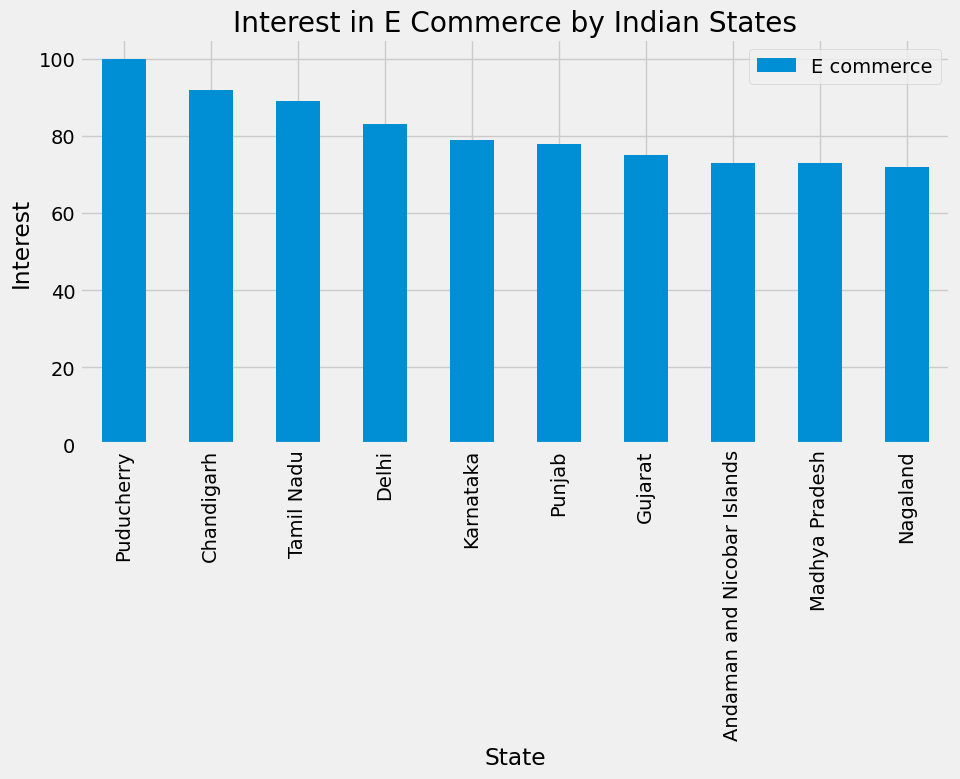

Skipping Top Charts Data for 2024 due to potential unsupported geo parameter.
No related queries found or an error occurred: list index out of range
Suggestions for 'E commerce':
        title                  type
0  E-commerce                 Topic
1  Fleet Farm  Retail chain company
2       Jumia   Marketplace company
3      JD.com    E-commerce company
4     Buscapé      Internet company


In [9]:
import pandas as pd 
from pytrends.request import TrendReq 
import matplotlib.pyplot as plt 

# Initialize pytrends request
Trending_topics = TrendReq(hl='en-US', tz=330)  # 330 is the timezone offset for India

# Defining the keyword list with "E commerce"
kw_list = ["E commerce"] 

# Building the payload for interest over time with geo set to India
Trending_topics.build_payload(kw_list, cat=0, timeframe='2024-01-01 2024-12-31', geo='IN')

# Fetch and display interest over time data
data = Trending_topics.interest_over_time() 

if "E commerce" in data.columns:
    data = data.sort_values(by="E commerce", ascending=False)
    data = data.head(10)
    print("Interest Over Time Data:")
    print(data)
else:
    print("The keyword 'E commerce' was not found in the data.")

# Fetch and display interest by region(Indian states)
data_region = Trending_topics.interest_by_region()

if "E commerce" in data_region.columns:
    data_region = data_region.sort_values(by="E commerce", ascending=False)
    data_region = data_region.head(10)
    print("Interest By Indian States Data:")
    print(data_region)
    
    # Plotting the interest by Indian states
    data_region.reset_index().plot(x='geoName', y='E commerce', 
                                   figsize=(10,5), kind="bar")
    plt.style.use('fivethirtyeight') 
    plt.title('Interest in E Commerce by Indian States')
    plt.xlabel('State')
    plt.ylabel('Interest')
    plt.show()
else:
    print("The keyword 'E commerce' was not found in the region data.")

# Fetch and display top charts for 2024 (India)
# Note: The top_charts function may not support geo parameter, so we skip this section.
print("Skipping Top Charts Data for 2024 due to potential unsupported geo parameter.")

# Building the payload again for related queries and suggestions
Trending_topics.build_payload(kw_list=['E commerce'], geo='IN')

# Fetch and display related queries with error handling
try:
    related_queries = Trending_topics.related_queries()
    print("Related Queries Data:")
    print(related_queries)
except IndexError as e:
    print("No related queries found or an error occurred:", e)

# Fetch and display suggestions for "E commerce"
keywords = Trending_topics.suggestions(keyword='E commerce') 
df_keywords = pd.DataFrame(keywords) 
print("Suggestions for 'E commerce':")
print(df_keywords.drop(columns='mid'))
